# Deep Learning Basics

## MultiLayer Perceptron/ Feed Forward Architecture
### Implementing a 3 Layer Neural Network  from scratch
<img src="./images/neural_net.gif"
     alt="Perceptron"
     style="width: 450px;" />

#### **Learning Goals**(Theory + Implementation)
- Understand the Multilayer Perpcetron (MLP) Architecture
- Understanding Forward Propagation & Backpropagtion, Loss & Activation Fn's
- Making Predictions
- Checking classification performance on different datasets
- Classification Project 

### Part-1 Implementation Forward Propagation
- Understanding the architecture
- One Layer, Two Layer and Three Layer Networks
- Building a 3 Layer MLP(with 2 hidden layers)
- Writing the code
### Part-2 Implementation Forward Propagation
- How to pass one example? [DONE]
- How to pass multiples examples(Vectorization)?
- Understanding what is softmax?
- Writing the code

# Part -I Neural Architecture



#### **1 Layer Network** 
<img src="./images/Perceptron.png"
     alt="Perceptron"
     style="width: 300px;" />
- Simplest unit Perceptron
- Only one output unit
- No hidden units
- Input is not counted in layers



#### **2 Layer Network** 
<img src="./images/one_white.png"
     alt="Perceptron"
     style="width: 450px;" />

- Two layers 1 Hidden + 1 output
- Multi-layer perceptron or feed forward net or deep forward net


#### **3 Layer Network** 
<img src="./images/two_white.png"
     alt="Perceptron"
     style="width: 550px;" />

- Two layers 1 Hidden + 1 output
- Multi-layer perceptron/feed forward net/deep forward net

 






### Part-3
# Backpropagation Algorithm!
#### Building a Multi-layer neural network for Pokemon Classification from scratch

<img src="./images/pokemon_back.jpg"
     alt="pokemon_back.jpg"
     style="width: 800px;" />


- One of the most difficult/trickiest things in ML to get right
- Why do we need this?

<img src="./images/1-1.gif"
     alt="Perceptron"
     style="width: 550px;" />

- Quite Mathematical, challenging to understand
- **Good Thing** - As a deep learning engineer, you never have to implement backpropagation from scratch.... 
###  but we are going build it from scratch :D !!

In [1]:
import numpy as np

In [2]:
#Model Parameters
input_size = 3 # no_of_features
layers = [4,3] # no of neurons in 1st and 2nd layer
output_size = 2


In [3]:
def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans
    

In [4]:
a = np.array([[10,20]])

a_ = softmax(a)
print(a_)

[[4.53978687e-05 9.99954602e-01]]


In [100]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)
        
    

In [1]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht
    

### Generating Data

In [102]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [103]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

In [104]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


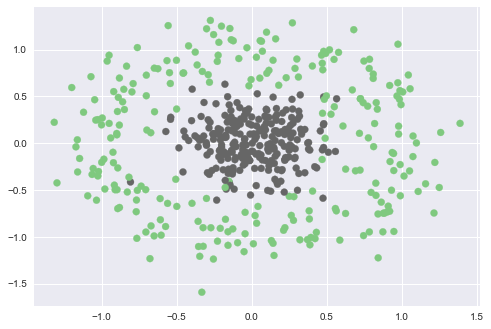

In [105]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Training Our Model

In [106]:
model  = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [107]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [108]:
losses = train(X,Y,model,500,0.001)

Epoch 0 Loss 0.3571
Epoch 1 Loss 0.3554
Epoch 2 Loss 0.2593
Epoch 3 Loss 0.2407
Epoch 4 Loss 0.2258
Epoch 5 Loss 0.2132
Epoch 6 Loss 0.2020
Epoch 7 Loss 0.1919
Epoch 8 Loss 0.1827
Epoch 9 Loss 0.1742
Epoch 10 Loss 0.1664
Epoch 11 Loss 0.1593
Epoch 12 Loss 0.1527
Epoch 13 Loss 0.1467
Epoch 14 Loss 0.1411
Epoch 15 Loss 0.1360
Epoch 16 Loss 0.1313
Epoch 17 Loss 0.1270
Epoch 18 Loss 0.1230
Epoch 19 Loss 0.1193
Epoch 20 Loss 0.1159
Epoch 21 Loss 0.1127
Epoch 22 Loss 0.1098
Epoch 23 Loss 0.1070
Epoch 24 Loss 0.1045
Epoch 25 Loss 0.1021
Epoch 26 Loss 0.0999
Epoch 27 Loss 0.0978
Epoch 28 Loss 0.0958
Epoch 29 Loss 0.0940
Epoch 30 Loss 0.0922
Epoch 31 Loss 0.0906
Epoch 32 Loss 0.0891
Epoch 33 Loss 0.0876
Epoch 34 Loss 0.0862
Epoch 35 Loss 0.0849
Epoch 36 Loss 0.0837
Epoch 37 Loss 0.0825
Epoch 38 Loss 0.0814
Epoch 39 Loss 0.0803
Epoch 40 Loss 0.0793
Epoch 41 Loss 0.0783
Epoch 42 Loss 0.0774
Epoch 43 Loss 0.0765
Epoch 44 Loss 0.0756
Epoch 45 Loss 0.0748
Epoch 46 Loss 0.0740
Epoch 47 Loss 0.0732
Ep

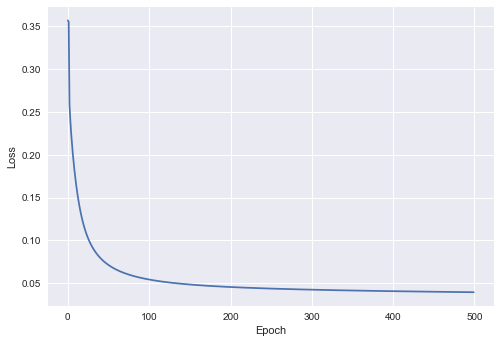

In [109]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [110]:
model.summary()

W1  (2, 10)
A1  (500, 10)
W2  (10, 5)
A2  (500, 5)
W3  (5, 2)
Y_  (500, 2)


In [111]:
## Find Accuracy
from visualize import plot_decision_boundary

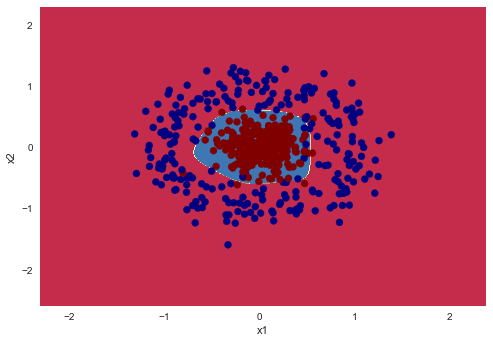

In [112]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [113]:
outputs = model.predict(X)

In [114]:
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training Accuracy %.4f"%(training_accuracy*100))

Training Accuracy 97.0000


## Testing on other non-linear datasets

In [115]:
model  = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

# XOR dataset

In [116]:
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
Y = np.array([0,1,1,0])

In [117]:
losses = train(X,Y,model,200,0.1)

Epoch 0 Loss 0.3427
Epoch 1 Loss 0.2543
Epoch 2 Loss 0.2126
Epoch 3 Loss 0.1926
Epoch 4 Loss 0.1778
Epoch 5 Loss 0.1639
Epoch 6 Loss 0.1493
Epoch 7 Loss 0.1346
Epoch 8 Loss 0.1207
Epoch 9 Loss 0.1089
Epoch 10 Loss 0.1008
Epoch 11 Loss 0.1004
Epoch 12 Loss 0.1244
Epoch 13 Loss 0.1949
Epoch 14 Loss 0.3900
Epoch 15 Loss 0.1355
Epoch 16 Loss 0.0958
Epoch 17 Loss 0.0762
Epoch 18 Loss 0.0636
Epoch 19 Loss 0.0552
Epoch 20 Loss 0.0492
Epoch 21 Loss 0.0447
Epoch 22 Loss 0.0412
Epoch 23 Loss 0.0384
Epoch 24 Loss 0.0361
Epoch 25 Loss 0.0341
Epoch 26 Loss 0.0323
Epoch 27 Loss 0.0307
Epoch 28 Loss 0.0293
Epoch 29 Loss 0.0281
Epoch 30 Loss 0.0269
Epoch 31 Loss 0.0258
Epoch 32 Loss 0.0248
Epoch 33 Loss 0.0239
Epoch 34 Loss 0.0231
Epoch 35 Loss 0.0223
Epoch 36 Loss 0.0215
Epoch 37 Loss 0.0208
Epoch 38 Loss 0.0202
Epoch 39 Loss 0.0196
Epoch 40 Loss 0.0190
Epoch 41 Loss 0.0184
Epoch 42 Loss 0.0179
Epoch 43 Loss 0.0174
Epoch 44 Loss 0.0170
Epoch 45 Loss 0.0165
Epoch 46 Loss 0.0161
Epoch 47 Loss 0.0157
Ep

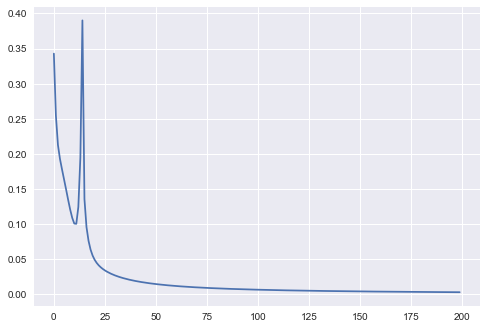

In [118]:
plt.plot(losses)

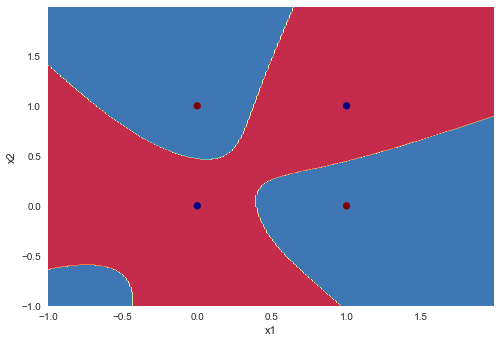

In [119]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

### Comparing our other data-sets

## Other Datasets

In [120]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [121]:
def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,
                                  random_state=None)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y    


Training Accuracy 1.0000


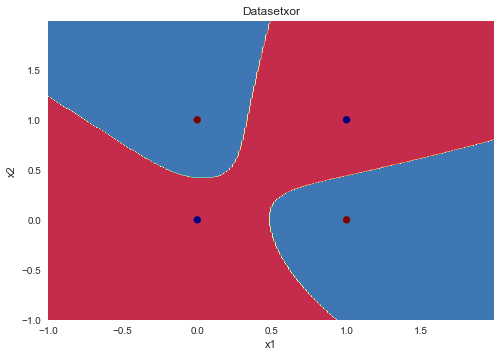

Training Accuracy 0.9560


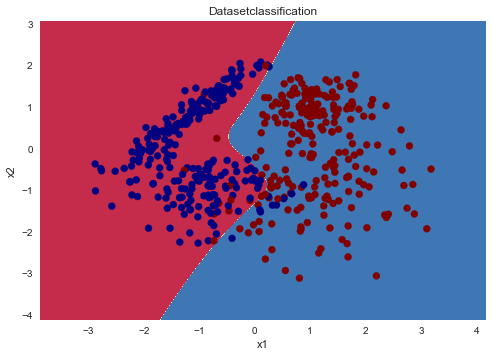

Training Accuracy 0.9740


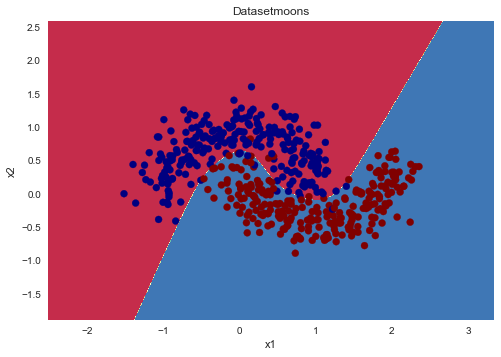

Training Accuracy 0.9640


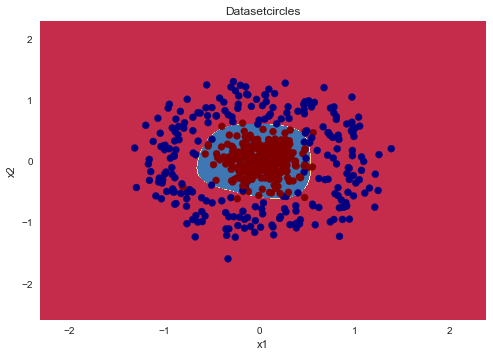

In [122]:
datasets = ['xor','classification','moons','circles']
for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    
    training_accuracy = np.sum(outputs==Y)/Y.shape
    print("Training Accuracy %.4f"%training_accuracy)
    
    plt.title("Dataset"+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()